# <span style='color:orange'> Continuous Probabilistic Methods

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


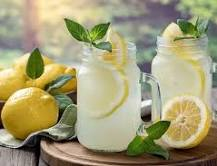

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:


def get_lemonade_data():
    '''
    This function acquires the lemondade csv
    '''
    filename = 'lemondade.csv'

    # Verify if file exists
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    # Download data if file doesn't exist
    else:
        url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
        try:
            df = pd.read_csv(url)
            df.to_csv(filename, index=False)
            print("Data acquired and saved successfully.")
            return df
        except Exception as e:
            print("Error while downloading the data:", e)
            return None


In [3]:
df_lemonade = get_lemonade_data()
df_lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df_lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df_lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [6]:
df_lemonade.Date = pd.to_datetime(df_lemonade.Date)
df_lemonade = df_lemonade.set_index("Date")

In [7]:
df_lemonade["month"] = df_lemonade.index.month_name()


In [8]:
df_lemonade.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 3.0. Do these lower outliers make sense? Which outliers should be kept?

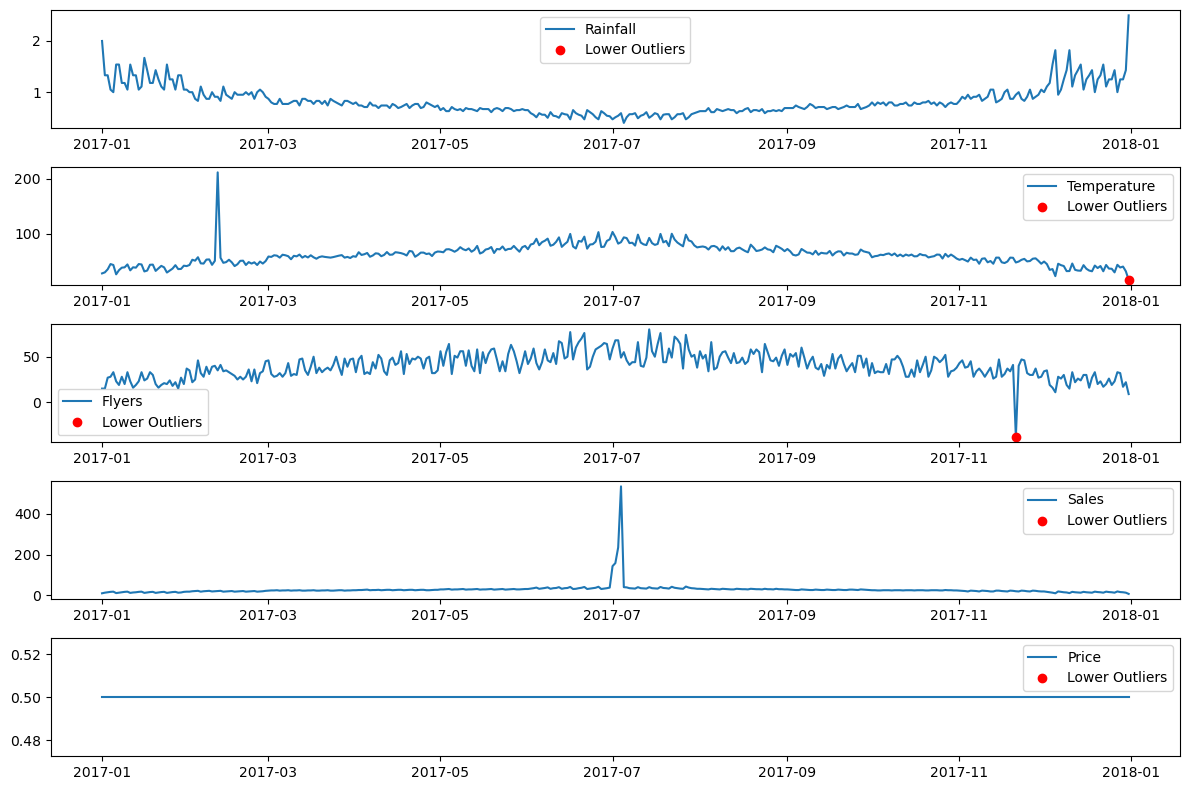

In [9]:

# Define a function to identify lower outliers using the IQR Range Rule
def identify_lower_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return column[column < lower_bound]

# Create 5 subplots
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 8))

# Identify lower outliers for the 'Rainfall' column and plot
lower_outliers_day = identify_lower_outliers(df_lemonade['Rainfall'])
ax1.plot(df_lemonade['Rainfall'], label='Rainfall')
ax1.plot(lower_outliers_day, 'ro', label='Lower Outliers')
ax1.legend()


# Identify lower outliers for the 'Temperature' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Temperature'])
ax2.plot(df_lemonade['Temperature'], label='Temperature')
ax2.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax2.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Flyers'])
ax3.plot(df_lemonade['Flyers'], label='Flyers')
ax3.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax3.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Sales'])
ax4.plot(df_lemonade['Sales'], label='Sales')
ax4.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax4.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Price'])
ax5.plot(df_lemonade['Price'], label='Price')
ax5.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax5.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


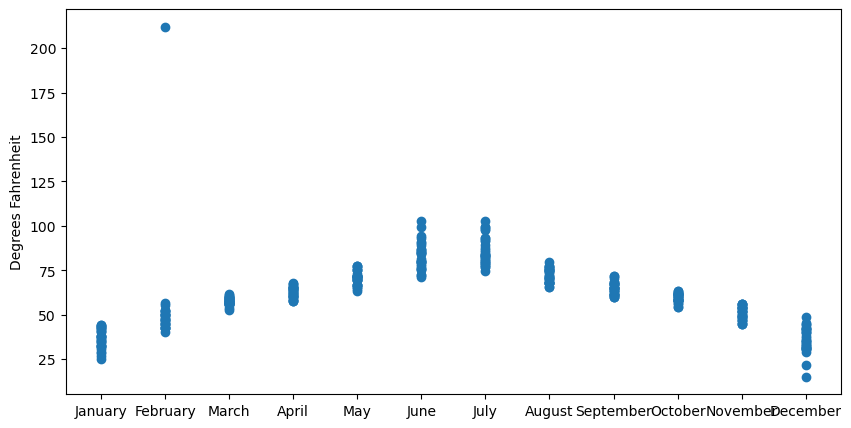

In [10]:
#Andy
plt.figure(figsize=(10,5))
plt.scatter(df_lemonade.month, df_lemonade.Temperature)
plt.ylabel("Degrees Fahrenheit")
plt.show()

In [11]:
# Let's look at the highest temperature days
# Looks like something is going on with that temperature above 200...
df_lemonade[df_lemonade.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July


In [12]:
# Let's take a look at the days nearby.
df_lemonade.loc["2017-02-09":"2017-02-13"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [13]:
# Let's assign the temperature for this day to be the same temperature as yesterday
df_lemonade.loc[df_lemonade.Temperature == 212, "Temperature"] = df_lemonade.loc["2017-02-10"].Temperature

#### Flyers

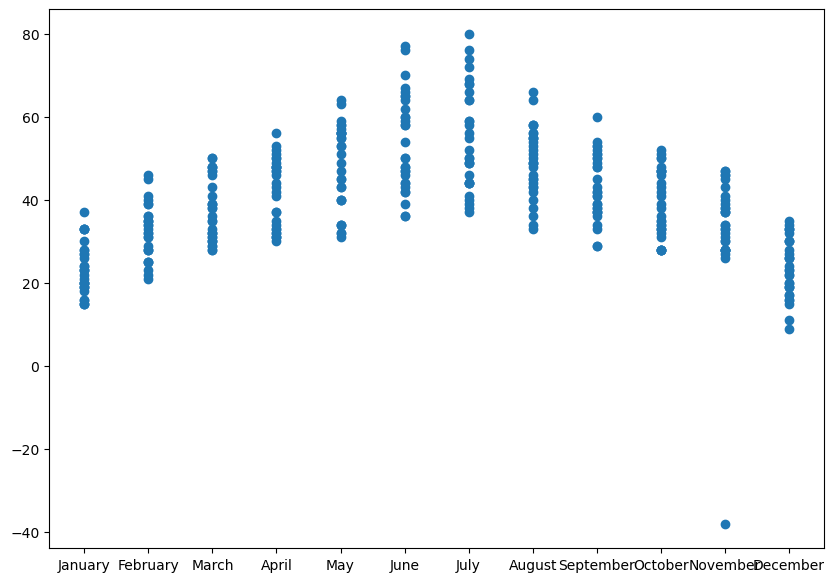

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(df_lemonade.month, df_lemonade.Flyers)

In [15]:
# What is the index of that negative Flyer value?
df_lemonade.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [16]:
# Negative flyers don't make sense. Let's look at what's going on near that observation
df_lemonade.loc["2017-11-19":"2017-11-23"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November
2017-11-20,Monday,55.6,0.87,41,0.5,22,November
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November


### b.  Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 3.0. Do these upper outliers make sense? Which outliers should be kept?

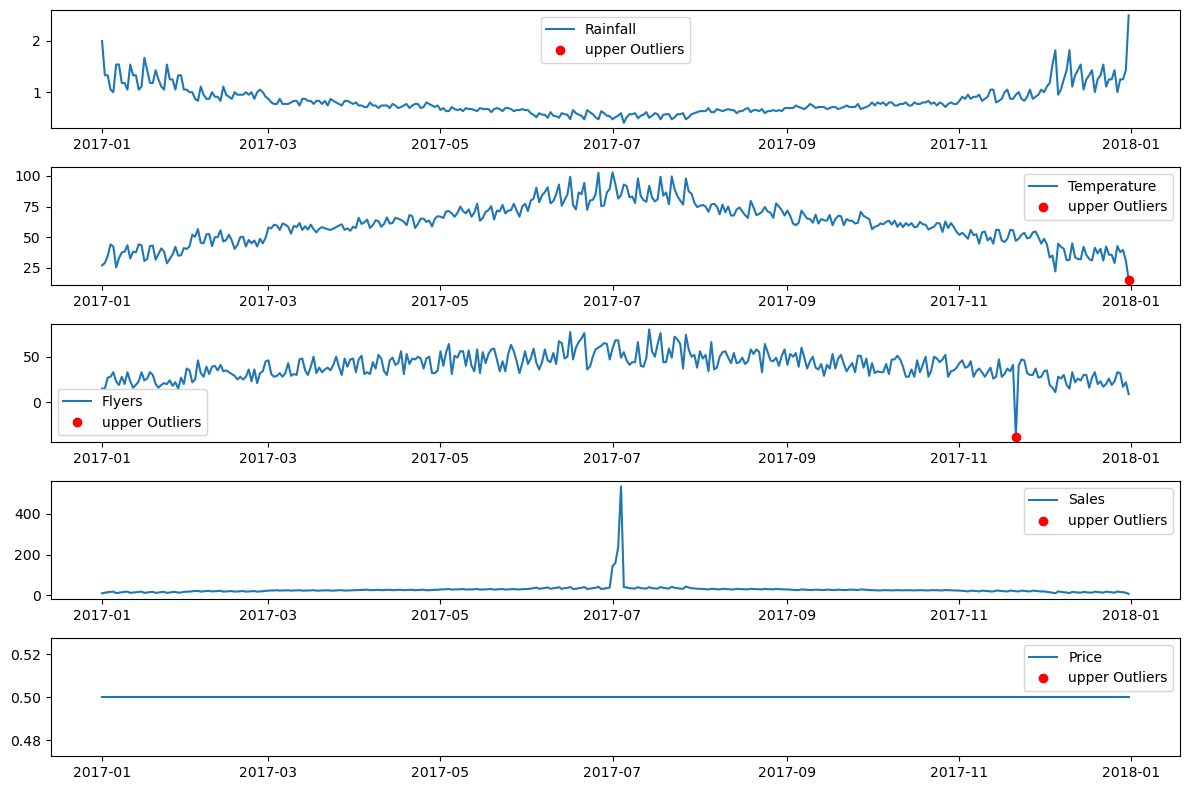

In [17]:

# Define a function to identify upper outliers using the IQR Range Rule
def identify_upper_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q1 - 1.5 * IQR
    return column[column < upper_bound]

# Create 5 subplots
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 8))

# Identify upper outliers for the 'Rainfall' column and plot
upper_outliers_day = identify_upper_outliers(df_lemonade['Rainfall'])
ax1.plot(df_lemonade['Rainfall'], label='Rainfall')
ax1.plot(upper_outliers_day, 'ro', label='upper Outliers')
ax1.legend()


# Identify upper outliers for the 'Temperature' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Temperature'])
ax2.plot(df_lemonade['Temperature'], label='Temperature')
ax2.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax2.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Flyers'])
ax3.plot(df_lemonade['Flyers'], label='Flyers')
ax3.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax3.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Sales'])
ax4.plot(df_lemonade['Sales'], label='Sales')
ax4.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax4.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Price'])
ax5.plot(df_lemonade['Price'], label='Price')
ax5.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax5.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### c.  Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

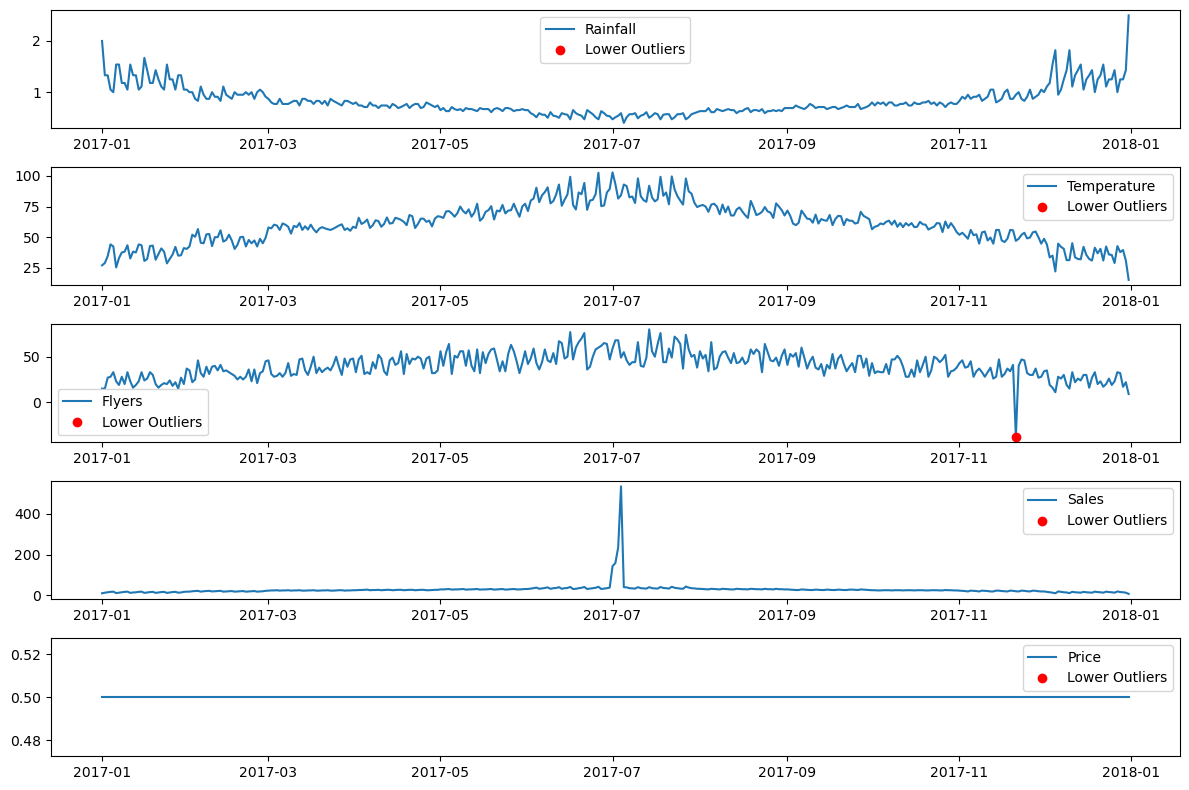

In [18]:

# Define a function to identify lower outliers using the IQR Range Rule
def identify_lower_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR
    return column[column < lower_bound]

# Create 5 subplots
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 8))

# Identify lower outliers for the 'Rainfall' column and plot
lower_outliers_day = identify_lower_outliers(df_lemonade['Rainfall'])
ax1.plot(df_lemonade['Rainfall'], label='Rainfall')
ax1.plot(lower_outliers_day, 'ro', label='Lower Outliers')
ax1.legend()


# Identify lower outliers for the 'Temperature' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Temperature'])
ax2.plot(df_lemonade['Temperature'], label='Temperature')
ax2.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax2.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Flyers'])
ax3.plot(df_lemonade['Flyers'], label='Flyers')
ax3.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax3.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Sales'])
ax4.plot(df_lemonade['Sales'], label='Sales')
ax4.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax4.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Price'])
ax5.plot(df_lemonade['Price'], label='Price')
ax5.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax5.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

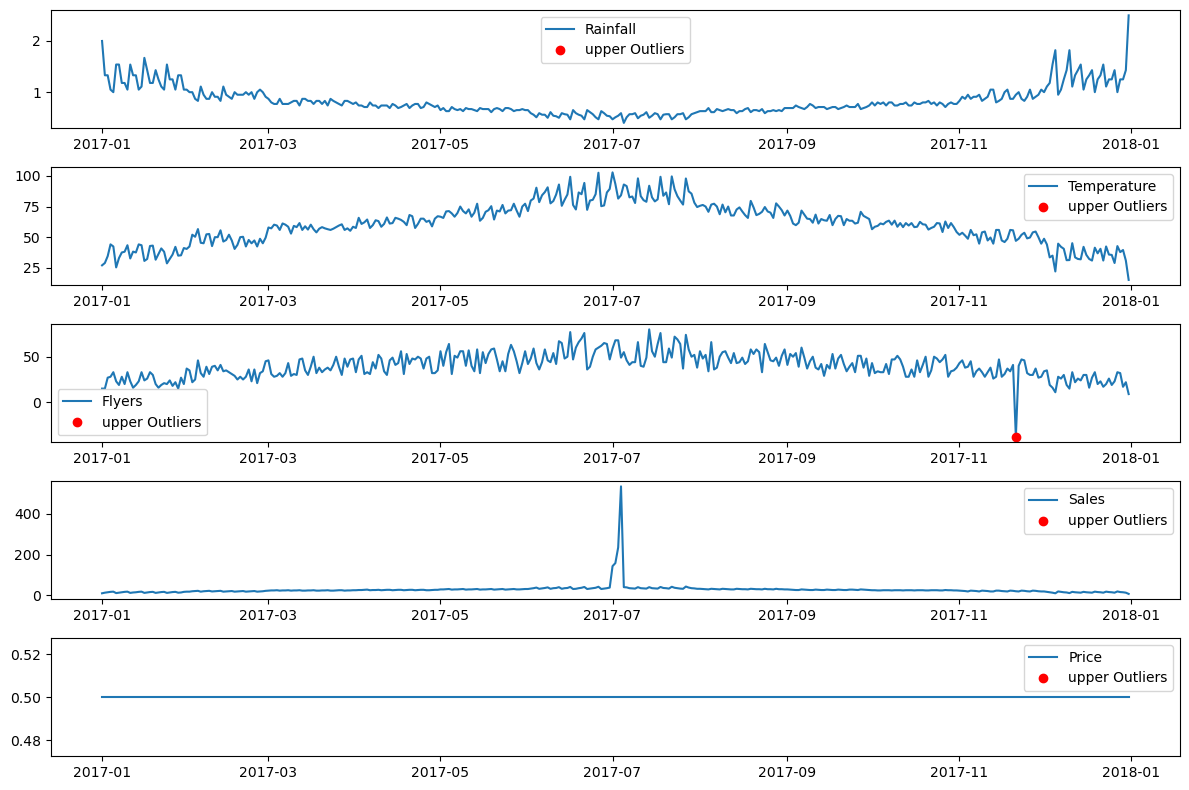

In [19]:

# Define a function to identify upper outliers using the IQR Range Rule
def identify_upper_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q1 - 3.0 * IQR
    return column[column < upper_bound]

# Create 5 subplots
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 8))

# Identify upper outliers for the 'Rainfall' column and plot
upper_outliers_day = identify_upper_outliers(df_lemonade['Rainfall'])
ax1.plot(df_lemonade['Rainfall'], label='Rainfall')
ax1.plot(upper_outliers_day, 'ro', label='upper Outliers')
ax1.legend()


# Identify upper outliers for the 'Temperature' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Temperature'])
ax2.plot(df_lemonade['Temperature'], label='Temperature')
ax2.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax2.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Flyers'])
ax3.plot(df_lemonade['Flyers'], label='Flyers')
ax3.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax3.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Sales'])
ax4.plot(df_lemonade['Sales'], label='Sales')
ax4.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax4.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Price'])
ax5.plot(df_lemonade['Price'], label='Price')
ax5.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax5.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

### 6. Use a 2 sigma decision rule to isolate the outliers.

In [20]:
#Andy code
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [21]:
outliers = {}
for col in df_lemonade.columns:
    if np.issubdtype(df_lemonade[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df_lemonade[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df_lemonade[(df_lemonade[col] > upper_bound) | (df_lemonade[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 17.30000000000001
 Upper bound for Temperature: 103.69999999999999

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [22]:
outliers.keys()


dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [23]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December


In [24]:
outliers['Rainfall']


{'bounds': {'upper': 1.3, 'lower': 0.26},
 'df':                   Day  Temperature  Rainfall  Flyers  Price  Sales     month
 Date                                                                        
 2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
 2017-01-02     Monday         28.9      1.33      15    0.5     13   January
 2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
 2017-01-06     Friday         25.3      1.54      23    0.5     11   January
 2017-01-07   Saturday         32.9      1.54      19    0.5     13   January
 2017-01-11  Wednesday         32.6      1.54      23    0.5     12   January
 2017-01-12   Thursday         38.2      1.33      16    0.5     14   January
 2017-01-13     Friday         37.5      1.33      19    0.5     15   January
 2017-01-16     Monday         30.6      1.67      24    0.5     12   January
 2017-01-17    Tuesday         32.2      1.43      26    0.5     14   January
 2017-01-20     

In [25]:
# It looks like this negative flyer value is a simple typo
# And since the business isn't giving out a negative amount of promotional flyers, then we can take the absolute value
df_lemonade.Flyers = df_lemonade.Flyers.abs()
df_lemonade.loc["2017-11-21"].Flyers

38

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [27]:
z_outliers = {}
for col in df_lemonade.columns:
    if np.issubdtype(df_lemonade[col].dtype, np.number):
        if df_lemonade[col].std() != 0:
            z_score = (df_lemonade[col] - df_lemonade[col].mean()) / df_lemonade[col].std()
            print(f' z score for {col} is {z_score}\n')
            print('-----------------')
            z_outliers[col] = {}
            z_outliers[col]['z_score'] = {'z_score' : z_score}
            z_outliers[col]['df_lemonade'] = df_lemonade[((df_lemonade[col] - df_lemonade[col].mean()) / df_lemonade[col].std()) >2]
        else:
            pass
    else:
        pass

 z score for Temperature is Date
2017-01-01   -2.075945
2017-01-02   -1.959184
2017-01-03   -1.615045
2017-01-04   -1.025093
2017-01-05   -1.129564
                ...   
2017-12-27   -1.111128
2017-12-28   -1.412249
2017-12-29   -1.307778
2017-12-30   -1.836277
2017-12-31   -2.807241
Name: Temperature, Length: 365, dtype: float64

-----------------
 z score for Rainfall is Date
2017-01-01    4.286488
2017-01-02    1.840253
2017-01-03    1.840253
2017-01-04    0.817946
2017-01-05    0.635391
                ...   
2017-12-27    0.635391
2017-12-28    1.548165
2017-12-29    1.548165
2017-12-30    2.205363
2017-12-31    6.112037
Name: Rainfall, Length: 365, dtype: float64

-----------------
 z score for Flyers is Date
2017-01-01   -1.922928
2017-01-02   -1.922928
2017-01-03   -1.011312
2017-01-04   -0.935344
2017-01-05   -0.555503
                ...   
2017-12-27   -0.555503
2017-12-28   -0.631471
2017-12-29   -1.770992
2017-12-30   -1.391152
2017-12-31   -2.378737
Name: Flyers, Length:

### a. Do these make sense?
Yes
### b. Should certain outliers be kept or removed?
Temp 212 outlier and others removed or adjusted 